<a href="https://colab.research.google.com/github/nimishgarg24/Stock-price-prediction/blob/main/Copy_of_rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [ ]:
dataset=pd.read_csv('Google_Stock_Price_Train.csv')
training_set=dataset.iloc[:,1:2].values


In [ ]:
print(training_set)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]


### Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(training_set)

In [ ]:
print(training_set_scaled)

[[0.08581368]
 [0.09701243]
 [0.09433366]
 ...
 [0.95725128]
 [0.93796041]
 [0.93688146]]


### Creating a data structure with 60 timesteps and 1 output

In [ ]:
x_train=[]
y_train=[]
for i in range(60,1258):
  x_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)

In [ ]:
print(x_train)

[[0.08581368 0.09701243 0.09433366 ... 0.07846566 0.08034452 0.08497656]
 [0.09701243 0.09433366 0.09156187 ... 0.08034452 0.08497656 0.08627874]
 [0.09433366 0.09156187 0.07984225 ... 0.08497656 0.08627874 0.08471612]
 ...
 [0.92106928 0.92438053 0.93048218 ... 0.95475854 0.95204256 0.95163331]
 [0.92438053 0.93048218 0.9299055  ... 0.95204256 0.95163331 0.95725128]
 [0.93048218 0.9299055  0.93113327 ... 0.95163331 0.95725128 0.93796041]]


In [ ]:
print(y_train)

[0.08627874 0.08471612 0.07454052 ... 0.95725128 0.93796041 0.93688146]


### Reshaping

In [ ]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [ ]:
print(x_train)

[[[0.08581368]
  [0.09701243]
  [0.09433366]
  ...
  [0.07846566]
  [0.08034452]
  [0.08497656]]

 [[0.09701243]
  [0.09433366]
  [0.09156187]
  ...
  [0.08034452]
  [0.08497656]
  [0.08627874]]

 [[0.09433366]
  [0.09156187]
  [0.07984225]
  ...
  [0.08497656]
  [0.08627874]
  [0.08471612]]

 ...

 [[0.92106928]
  [0.92438053]
  [0.93048218]
  ...
  [0.95475854]
  [0.95204256]
  [0.95163331]]

 [[0.92438053]
  [0.93048218]
  [0.9299055 ]
  ...
  [0.95204256]
  [0.95163331]
  [0.95725128]]

 [[0.93048218]
  [0.9299055 ]
  [0.93113327]
  ...
  [0.95163331]
  [0.95725128]
  [0.93796041]]]


## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [ ]:
regressor=Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [ ]:
regressor.add(Dense(units=1))

### Compiling the RNN

In [ ]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

### Fitting the RNN to the Training set

In [ ]:
regressor.fit(x_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
38/38 [==============================] - 13s 109ms/step - loss: 0.0463
Epoch 2/100
38/38 [==============================] - 5s 137ms/step - loss: 0.0073
Epoch 3/100
38/38 [==============================] - 4s 109ms/step - loss: 0.0053
Epoch 4/100
38/38 [==============================] - 5s 126ms/step - loss: 0.0050
Epoch 5/100
38/38 [==============================] - 5s 117ms/step - loss: 0.0053
Epoch 6/100
38/38 [==============================] - 4s 109ms/step - loss: 0.0049
Epoch 7/100
38/38 [==============================] - 5s 135ms/step - loss: 0.0044
Epoch 8/100
38/38 [==============================] - 4s 109ms/step - loss: 0.0045
Epoch 9/100
38/38 [==============================] - 4s 111ms/step - loss: 0.0043
Epoch 10/100
38/38 [==============================] - 5s 144ms/step - loss: 0.0045
Epoch 11/100
38/38 [==============================] - 4s 109ms/step - loss: 0.0039
Epoch 12/100
38/38 [==============================] - 5s 136ms/step - loss: 0.0040
Epoch 13/100

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [ ]:
dataset_test=pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price=dataset_test.iloc[:,1:2].values

### Getting the predicted stock price of 2017

In [ ]:
datset_total=pd.concat((dataset['Open'],dataset_test['Open']),axis=0)
inputs=datset_total[len(datset_total)-len(dataset_test)-60:].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)
x_test=[]
for i in range(60,80):
  x_test.append(inputs[i-60:i,0])

x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
predicted_stock_price=regressor.predict(x_test)
predicted_stock_price=sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 2s 2s/step


In [ ]:
print(predicted_stock_price)

[[789.10205]
 [786.4142 ]
 [786.6084 ]
 [787.8588 ]
 [791.0235 ]
 [796.7358 ]
 [802.04877]
 [804.3629 ]
 [804.91705]
 [804.8316 ]
 [804.6108 ]
 [804.27673]
 [803.9979 ]
 [804.4476 ]
 [805.3683 ]
 [809.91833]
 [816.72614]
 [824.0729 ]
 [828.23096]
 [824.54034]]


### Visualising the results

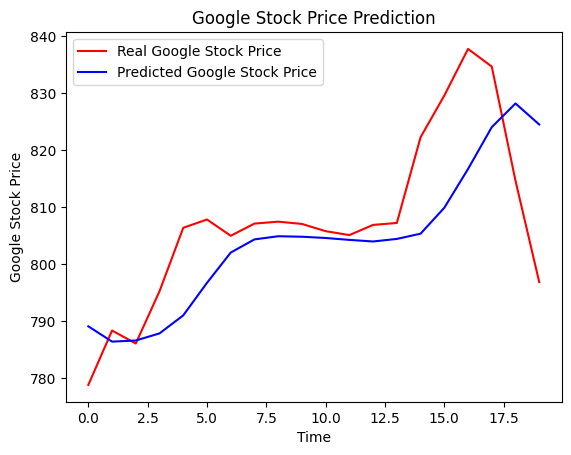

In [ ]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()